In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from PIL import Image
import os
from pathlib import Path
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import tensorflow.keras.backend as K
from sklearn.metrics import confusion_matrix, classification_report
import cv2

In [ ]:
#Replace to local path on device
base_dir = Path("/flower_data") 
train_dir = base_dir / "train" 
val_dir = base_dir / "valid"
test_dir = base_dir / "test"

In [ ]:
datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="sparse"
)

val_data = datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="sparse"
)

test_data = datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="sparse"
)

def create_model(input_shape=(150, 150, 3)):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(train_data.num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_model(input_shape=(150, 150, 3))
model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)
test_loss, test_acc = model.evaluate(test_data)
print(f"Test accuracy on original images: {test_acc}")


Found 6552 images belonging to 102 classes.
Found 818 images belonging to 102 classes.
Found 815 images belonging to 1 classes.
Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


205/205 ━━━━━━━━━━━━━━━━━━━━ 48s 230ms/step - accuracy: 0.0570 - loss: 4.3549 - val_accuracy: 0.1907 - val_loss: 3.3620
Epoch 2/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 57s 279ms/step - accuracy: 0.2461 - loss: 3.0177 - val_accuracy: 0.3056 - val_loss: 2.7222
Epoch 3/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 65s 319ms/step - accuracy: 0.4733 - loss: 2.0038 - val_accuracy: 0.3716 - val_loss: 2.5884
Epoch 4/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 63s 306ms/step - accuracy: 0.7161 - loss: 1.0344 - val_accuracy: 0.3839 - val_loss: 2.6504
Epoch 5/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 60s 293ms/step - accuracy: 0.8985 - loss: 0.3738 - val_accuracy: 0.4120 - val_loss: 3.2536
Epoch 6/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 58s 284ms/step - accuracy: 0.9679 - loss: 0.1211 - val_accuracy: 0.4230 - val_loss: 3.6555
Epoch 7/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 59s 286ms/step - accuracy: 0.9919 - loss: 0.0406 - val_accuracy: 0.3716 - val_loss: 4.3540
Epoch 8/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 60s 290ms/step - accuracy: 0.9738 - loss: 0.0900 - val

In [ ]:
def create_grayscale_generator(directory):
    grayscale_datagen = ImageDataGenerator(
        rescale=1.0/255.0
    )
    grayscale_generator = grayscale_datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=32,
        class_mode="sparse",
        color_mode='grayscale'
    )
    return grayscale_generator

grayscale_train_data = create_grayscale_generator(train_dir)
grayscale_val_data = create_grayscale_generator(val_dir)
grayscale_test_data = create_grayscale_generator(test_dir)

model = create_model(input_shape=(150, 150, 1))
model.fit(
    grayscale_train_data,
    validation_data=grayscale_val_data,
    epochs=10
)

test_loss, test_acc = model.evaluate(grayscale_test_data)
print(f"Test accuracy on grayscale images: {test_acc}")

Found 6552 images belonging to 102 classes.
Found 818 images belonging to 102 classes.
Found 815 images belonging to 1 classes.
Epoch 1/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 47s 227ms/step - accuracy: 0.0307 - loss: 4.5556 - val_accuracy: 0.0917 - val_loss: 4.1700
Epoch 2/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 46s 223ms/step - accuracy: 0.1135 - loss: 3.9615 - val_accuracy: 0.1577 - val_loss: 3.6330
Epoch 3/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 47s 229ms/step - accuracy: 0.2267 - loss: 3.2618 - val_accuracy: 0.2262 - val_loss: 3.3167
Epoch 4/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 47s 231ms/step - accuracy: 0.3837 - loss: 2.4463 - val_accuracy: 0.2396 - val_loss: 3.2573
Epoch 5/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 48s 235ms/step - accuracy: 0.5558 - loss: 1.6667 - val_accuracy: 0.2286 - val_loss: 3.6761
Epoch 6/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 48s 233ms/step - accuracy: 0.7476 - loss: 0.9638 - val_accuracy: 0.2372 - val_loss: 4.4702
Epoch 7/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 49s 238ms/step - accuracy: 0.8717 - loss: 0.47

In [ ]:
def add_gaussian_noise(image, mean=0, var=0.01):
    row, col, ch = image.shape
    sigma = var**0.5
    gaussian = np.random.normal(mean, sigma, (row, col, ch))
    noisy_image = np.array(image, dtype=float) + gaussian
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image.astype(np.float32)

def create_noisy_generator(directory):
    noisy_datagen = ImageDataGenerator(
        rescale=1.0/255.0,
        preprocessing_function=add_gaussian_noise 
    )
    noisy_generator = noisy_datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=32,
        class_mode="sparse"
    )
    return noisy_generator

noisy_train_data = create_noisy_generator(train_dir)
noisy_val_data = create_noisy_generator(val_dir)

test_data = datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="sparse"
)

model = create_model(input_shape=(150, 150, 3))
model.fit(
    noisy_train_data,
    validation_data=noisy_val_data,
    epochs=10
)
test_loss, test_acc = model.evaluate(test_data)
print(f"Test accuracy when trained on noisy images: {test_acc}")

Found 6552 images belonging to 102 classes.
Found 818 images belonging to 102 classes.
Found 815 images belonging to 1 classes.
Epoch 1/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 54s 260ms/step - accuracy: 0.0677 - loss: 4.2788 - val_accuracy: 0.2115 - val_loss: 3.2798
Epoch 2/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 55s 266ms/step - accuracy: 0.2770 - loss: 2.8879 - val_accuracy: 0.3252 - val_loss: 2.7118
Epoch 3/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 54s 265ms/step - accuracy: 0.4965 - loss: 1.8682 - val_accuracy: 0.4230 - val_loss: 2.2781
Epoch 4/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 51s 248ms/step - accuracy: 0.7298 - loss: 0.9825 - val_accuracy: 0.4108 - val_loss: 2.6609
Epoch 5/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 53s 259ms/step - accuracy: 0.8877 - loss: 0.4084 - val_accuracy: 0.4095 - val_loss: 3.0803
Epoch 6/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 56s 274ms/step - accuracy: 0.9490 - loss: 0.1659 - val_accuracy: 0.4425 - val_loss: 3.4139
Epoch 7/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 54s 263ms/step - accuracy: 0.9740 - loss: 0.09

In [ ]:
oriented_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2,  
    horizontal_flip=True,  
    fill_mode='nearest'  
)

model = create_model(input_shape=(150, 150, 3))
history = model.fit(
    oriented_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode="sparse"
    ),
    validation_data=val_data,
    epochs=10
)
test_loss, test_acc = model.evaluate(test_data)
print(f"Test accuracy when trained on augmented images: {test_acc}")

Found 6552 images belonging to 102 classes.
Epoch 1/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 52s 249ms/step - accuracy: 0.0383 - loss: 4.4211 - val_accuracy: 0.1174 - val_loss: 3.5970
Epoch 2/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 50s 242ms/step - accuracy: 0.1312 - loss: 3.5734 - val_accuracy: 0.1760 - val_loss: 3.4685
Epoch 3/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 50s 243ms/step - accuracy: 0.1990 - loss: 3.1794 - val_accuracy: 0.2775 - val_loss: 2.8207
Epoch 4/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 53s 259ms/step - accuracy: 0.2811 - loss: 2.8234 - val_accuracy: 0.3191 - val_loss: 2.6261
Epoch 5/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 53s 257ms/step - accuracy: 0.3235 - loss: 2.5941 - val_accuracy: 0.3802 - val_loss: 2.4104
Epoch 6/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 56s 270ms/step - accuracy: 0.3519 - loss: 2.4267 - val_accuracy: 0.3900 - val_loss: 2.4089
Epoch 7/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 55s 266ms/step - accuracy: 0.3954 - loss: 2.2798 - val_accuracy: 0.4621 - val_loss: 2.1762
Epoch 8/10
205/205 ━━━━━━━━━━━━━━━━━━━━

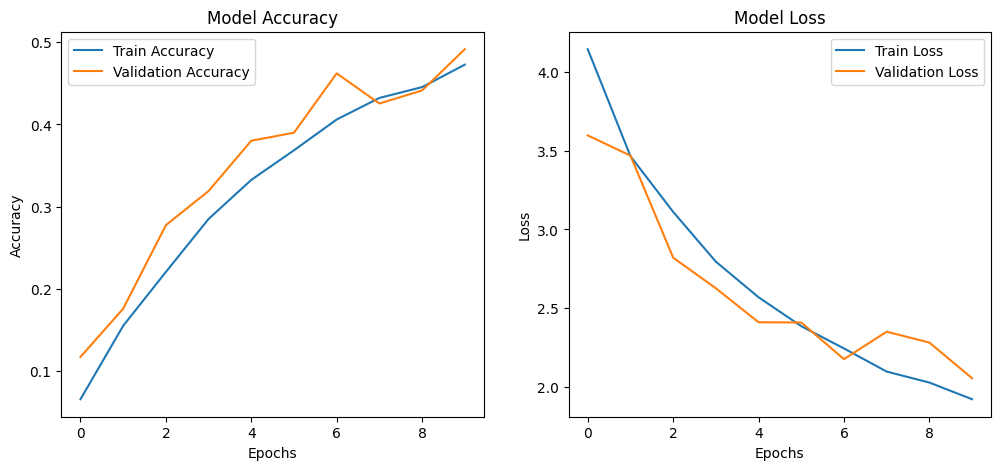

In [ ]:

def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    
    #Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    # plt.axhline(y=test_acc, color='r', linestyle='--', label='Test Accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()   
    plt.title("Model Accuracy")
    
    #Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Model Loss")
    plt.show()

plot_training_history(history)